In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
%matplotlib inline

In [3]:
import matplotlib 
matplotlib.rcParams["font.size"] = 16

## Lecture 40: Randomness
**Learning Objectives**

<pre>
40.1 Control a plot with
- axis limits
- pyplot.subplots to divide up a plot
- logy = True to plot a log graph

40.2 Use numpy.choice to generate random samples
- use size= to set the number of choices
- use p=[] to set the probabilities of choices
- use sort_index() and sort_value() to sort numpy.choice results
- use a seed value to determine a pseudo-random sequence

40.3 Place the results of many simulations into a dataframe and analyze them

40.4 Explain the Statistics concepts of fairness

40.5 Graph histograms of data, including normal distributions, using plot.hist()


### Remember the Iris Data? 


In [4]:
import requests
resp = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
resp.raise_for_status()

iris_fh = open("iris.data", "w")
iris_fh.write(resp.text)
iris_fh.close()

df = pd.read_csv("iris.data",
                 names=["sep-len", "sep-wid", "pet-len", "pet-wid", "class"])
df.head()

,sep-len,sep-wid,pet-len,pet-wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# make a set of the classes
classes = set(df["class"])

# make a dataframe just for "Iris-virginica"
df_sub = df[df["class"] == "Iris-virginica"]

#assert allows us to force a crash...good when debugging
assert(len(df_sub) == 50)

df_sub.head()

,sep-len,sep-wid,pet-len,pet-wid,class
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


### Axis limits allow us to control the rectangle of a plot
<pre>
- xlim=  ,   ylim= 
- can be a single number or a tuple of size 2

In [6]:
# TODO: play with the limits here...change them or remove them
# can you figure out what xlim and ylim do?

#df_sub.plot.scatter(x="pet-wid", y="pet-len")
#df_sub.plot.scatter(x="pet-wid", y="pet-len", xlim=1, ylim=6)
#df_sub.plot.scatter(x="pet-wid", y="pet-len", xlim=(1,3), ylim=(4,8))

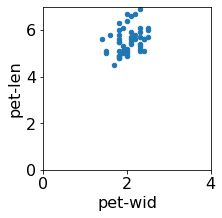

In [7]:
# can you figure out what this code is doing?
# TODO:  play with xlim and ylim to cause an AssertionError

ax = df_sub.plot.scatter(x="pet-wid", y="pet-len",
                     xlim=(0,4), ylim=(0,7),
                     figsize=(3,3))
assert df_sub[ax.get_xlabel()].min() >= ax.get_xlim()[0]
assert df_sub[ax.get_xlabel()].max() <= ax.get_xlim()[1]
assert df_sub[ax.get_ylabel()].min() >= ax.get_ylim()[0]
assert df_sub[ax.get_ylabel()].max() <= ax.get_ylim()[1]

### Use Log scale for data that has a very large range:

<AxesSubplot:>

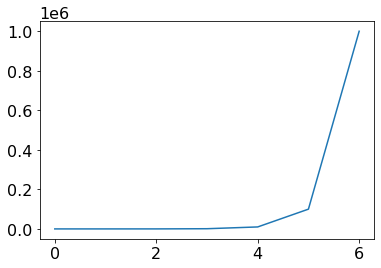

In [8]:
# fix this line plot so that it uses log scale for the y-axis
s = Series([1, 10, 100, 1000, 10000, 100000, 1000000])
s.plot.line()

### We can splitting up a plot by using pyplot.subplots
- pyplot.subplots allows us to specify the number of cols and rows
- pyplot.subplots returns a tuple of (figure object, numpy array of axes)

(<Figure size 432x288 with 6 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

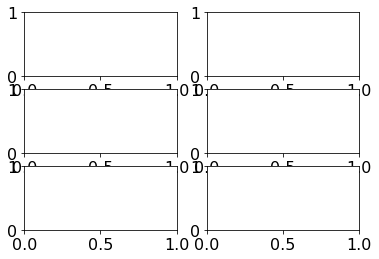

In [9]:
from matplotlib import pyplot
pyplot.subplots(nrows = 3, ncols = 2)

<AxesSubplot:>

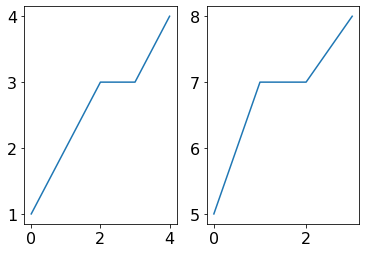

In [10]:
fig, axes = pyplot.subplots(ncols = 2)
# axes[0] # the area on the left
# axes[1] # the area on the right
Series([1,2,3,3,4]).plot.line(ax=axes[0])
Series([5,7,7,8]).plot.line(ax=axes[1])

<AxesSubplot:>

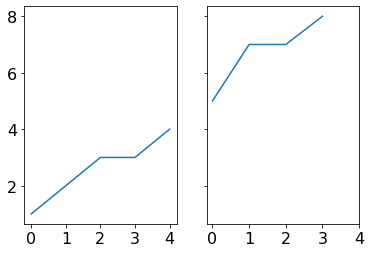

In [11]:
# sharey means 'share y axis'

fig, axes = pyplot.subplots(ncols = 2, sharey = True)
# axes[0] # the area on the left
# axes[1] # the area on the right
Series([1,2,3,3,4]).plot.line(ax=axes[0], xticks = range(5))
Series([5,7,7,8]).plot.line(ax=axes[1], xticks = range(5))

### Final Course Topic:  Randomness

In [12]:
from numpy.random import choice
choice(["rock", "paper", "scissors"])

'rock'

### Random choice using Numpy
Even though Python has a built-in random module, the numpy module's version has benefits
- Numpy plays well with Pandas
- Numpy is optimized
- Numpy has lots of features

In [13]:
# choice has a keyword argument size=
# returns an object called a numpy array
choice(["rock", "paper", "scissors"], size=5)

array(['scissors', 'scissors', 'paper', 'scissors', 'paper'], dtype='<U8')

In [14]:
type(choice(["rock", "paper", "scissors"], size=5))

numpy.ndarray

In [15]:
# Numpy arrays can be accessed like lists
a = choice(["rock", "paper", "scissors"], size=5)
a[2]


'paper'

In [16]:
# a numpy array can be made into a Series
from pandas import Series, DataFrame
Series(choice(["rock", "paper", "scissors"], size=5))

0    scissors
1       paper
2    scissors
3       paper
4        rock
dtype: object

----
### Multidimensional random Series
### Goal:  To Run a Massive Simulation with many trials

In [17]:
# the result of choice can be made into a 2d array
# TODO:  CHANGE THE SIZE TUPLE
a = choice(["rock", "paper", "scissors"], size=(5, 2))
print(a)


[['rock' 'rock']
 ['scissors' 'scissors']
 ['scissors' 'paper']
 ['rock' 'paper']
 ['paper' 'rock']]


In [18]:
# make a 4x7 dataframe with random choices of rock, paper, scissors
DataFrame()

""


----
### Random results will tyically not match theoretical probabilities
### but they are 'fair'

In [19]:
s = Series(choice(["rock", "paper", "scissors"], size=100))
vc = s      # TODO:  GRAB THE VALUE COUNTS OF S
print(vc)
# TODO:  MAKE A BAR CHART OF VALUE COUNTS
# TODO:  RUN THIS CELL MANY TIMES AND NOTICE THE RESULTS

0         rock
1     scissors
2        paper
3        paper
4        paper
        ...   
95        rock
96        rock
97        rock
98    scissors
99       paper
Length: 100, dtype: object


----
### A Series of random results can be sorted
<pre>
- sort_index()    by index....alphabetical?
- sort_value()    by value_counts

paper       37
scissors    34
rock        29
dtype: int64


<AxesSubplot:>

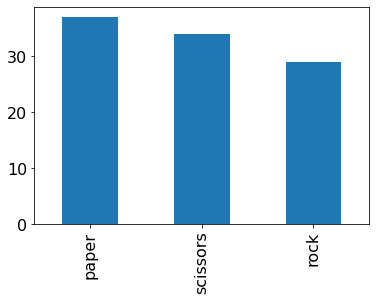

In [20]:
# sort this series by index using sort_index()
s = Series(choice(["rock", "paper", "scissors"], size=100))
vc = s.value_counts()
print(vc)
vc = vc # TODO: CALL SORT INDEX
vc.plot.bar()


paper       36
rock        36
scissors    28
dtype: int64


<AxesSubplot:>

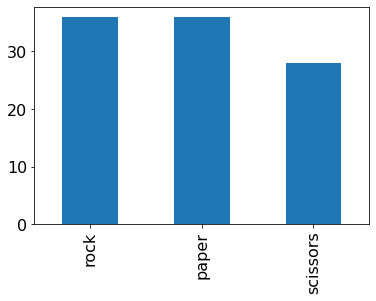

In [21]:
# sort by value_counts
s = Series(choice(["rock", "paper", "scissors"], size=100))
vc = s.value_counts()
print(vc)
vc = vc.sort_values(ascending=False) # TODO remove this
vc.plot.bar()

----
### Choice has a kwarg to allow you to control the probability of selection with a list
<pre>
- kwarg = "key word argument"
- p = [ list of floats between 0 and 1]

rock        28
paper       11
scissors    61
dtype: int64


<AxesSubplot:>

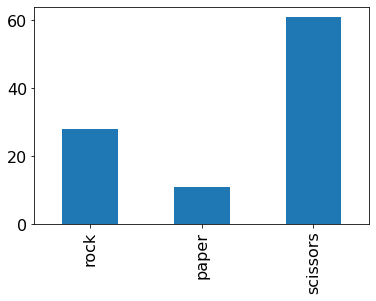

In [22]:
s = Series(choice(["rock", "paper", "scissors"], size=100, p=[0.30, 0.10, 0.60]))
vc = s.value_counts()
vc = vc[ ["rock", "paper", "scissors"] ] # this allows us to choose the ordering
print(vc)
vc.plot.bar()

----
### Random integer shortcut

In [23]:
choice(6, size=5)

array([0, 1, 4, 5, 1])

### How are Pseudo-Random Numbers Generated? 
- Numpy (and most simple random generators) uses a Pseudo-Random number generator
- a starting value determines the next value, and the next value and so on
- as long as the sequence is unpredictable, and generates equally likely outcomes, we can call it random


----
### A Random Seed is a number that used to generate the same sequence of random numbers
- This is because random number generators use a formula
- Random seeds are useful when running code with random numbers through test.py
- Random seeds are also useful when debugging code with random numbers

In [24]:
import numpy as np
np.random.seed(220)
choice(1000, size=3)
# no matter how many times you run this cell, you get the same result

array([883, 732,  15])

----
### We can make this a little more interesting by Seeding with time
- It still allows us to have a different outcome on each run

- We can trace the seed value when debugging

In [25]:
import time
time.time()  # number of seconds since 1-1-1970
now = int(time.time())
now
np.random.seed(now)

print("Seeded with:", now)
print(choice(1000, size=3))

Seeded with: 1619617164
[ 70 557 524]


----
### Big Idea in Statistics is Significance - 
### Does the data support drawing that conclusion?
### What is the probability that our results happened by chance?

----
### Is it weird that we have 60 heads, 40 tails? How often are we +- 10 of the expected
### Important Skill:  Place the results of a simulation into a Data Frame

In [26]:
# What happens when we flip 3 coins? Let's conduct 10 trials
flips = 3
trials = 10
df = DataFrame() # TODO:  fill this in
df

""


In [27]:
# Instead of H and T, we can use 1 for Heads and 0 for Tails
trials = 10
flips = 3
df = DataFrame() # TODO: FILL THIS IN
df

""


In [28]:
# BENEFIT OF USING 1=H, 0=T
# this allows us to add up the number of heads in each row easily
trials = 10
flips = 3
df = DataFrame()
print(df)
# sum across columns with axis=1 or axis = 'columns'
print(df)          # add across columns....try this 2 ways


Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []


In [29]:
# now that we understand how the Dataframe is set up, 
# do another, larger trial
trials = 10000
flips = 100
df = DataFrame() # TODO:  FIX THIS
print(df)
counts = df.sum() 
counts

Empty DataFrame
Columns: []
Index: []


Series([], dtype: float64)

In [30]:
# how many times will we get a total between less than 40 or more than 60 heads?
extremes = counts[] # TODO: FIX THIS
len(extremes)



SyntaxError: invalid syntax (<ipython-input-30-ce08b1259b7d>, line 2)

In [ ]:
# what percent of our trials is this? 
len(extremes) / trials *100

----
### if you flip 16 coins, 10000 times, 
### what percent of the time will you get 11 or more heads?

In [ ]:
# PRACTICE....ON YOUR OWN

----
### How often do we see 7 heads in a row (or more) in a when flipping 16 coins ? 
### Use choice and analyze each trial without making a dataframe

In [ ]:
seven_or_more = 0
trials = 10000
for i in range(trials):
    s = "".join(choice(["H","T"], size=16))
    #print(s)
    if s.find("HHHHHHH") != -1:
        seven_or_more += 1
seven_or_more / trials * 100

### FINAL CS220 TOPIC.... Graphing with Histograms

In [ ]:
# frequency of heads out of 100 flips
trials = 10000
flips = 100
df = DataFrame(choice([1,0], size = (trials, flips)))
counts = df.sum(axis=1)
counts.plot.hist(bins = 3) # TODO: CHANGE THIS NUMBER
#counts.plot.hist(bins = [30, 35, 40, 45, 50, 55, 60, 65, 70]) # TODO: CHANGE THESE NUMBERS
#TODO: ALSO TRY BINS = RANGE( , )

In [ ]:
# this looks like a normal distribution!
from numpy.random import normal 

# loc is the center of the distribution, 
# scale is the standard deviation (a measure of spread)
s = Series(normal(size=10000, loc=50, scale=10))
s.plot.hist(bins=100)

# TODO: CHANGE LOC, SCALE, BINS, SIZE

In [ ]:
# PRACTICE :Draw a normal distribution of total snowfall in a season in Madison, WI
# Assume the mean total of snow is 51 inches, with a standard deviation of 15 inches